In [1]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")

# Creating model object and indicating path
data_path = "../../../input/BES/stratbr_grid_v3/gempy_format/"
geo_model = gp.create_model("StratBR_BES_v3")

Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Step by step

In [2]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[0, 179000, 0, 148000, -17500, 1000],
    resolution=[120, 120, 100],
    path_i=data_path + "2_merged_sp_reduced_more_z_ajusted.csv",
    path_o=data_path + "orientations_points_v3_7.csv",
)

Active grids: ['regular']


StratBR_BES_v3  2023-09-25 12:21

In [3]:
gp.get_data(
    geo_model,
    "surfaces",
)

,surface,series,order_surfaces,color,id
0,TOP,Default series,1,#015482,1
1,bes_89,Default series,2,#9f0052,2
2,bes_90,Default series,3,#ffbe00,3
3,bes_91,Default series,4,#728f02,4
4,bes_92,Default series,5,#443988,5
5,bes_93,Default series,6,#ff3f20,6
6,bes_94,Default series,7,#5DA629,7
7,bes_95,Default series,8,#4878d0,8
8,bes_96,Default series,9,#ee854a,9
9,bes_97,Default series,10,#6acc64,10


In [4]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series": (
            "TOP",
            "bes_89",
            "bes_90",
            "bes_91",
            "bes_92",
            "bes_93",
            "bes_94",
            "bes_95",
            "bes_96",
            "bes_97",
            "bes_98",
            "bes_99",
            "bes_100",
        ),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,TOP,Strat_Series,1,#015482,1
1,bes_89,Strat_Series,2,#9f0052,2
2,bes_90,Strat_Series,3,#ffbe00,3
3,bes_91,Strat_Series,4,#728f02,4
4,bes_92,Strat_Series,5,#443988,5
5,bes_93,Strat_Series,6,#ff3f20,6
6,bes_94,Strat_Series,7,#5DA629,7
7,bes_95,Strat_Series,8,#4878d0,8
8,bes_96,Strat_Series,9,#ee854a,9
9,bes_97,Strat_Series,10,#6acc64,10


In [5]:
geo_model.get_data()

X         Y      Z    smooth  surface  \
surface_points 0          0.0       0.0  -2844  0.000002      TOP   
               1      10000.0       0.0  -3870  0.000002      TOP   
               2      20000.0       0.0  -3587  0.000002      TOP   
               3      30000.0       0.0  -4059  0.000002      TOP   
               4      40000.0       0.0  -4286  0.000002      TOP   
...                       ...       ...    ...       ...      ...   
               7620  150000.0  148000.0 -14455  0.000002  bes_100   
               7632  160000.0  148000.0 -14847  0.000002  bes_100   
               7644  170000.0  148000.0 -15043  0.000002  bes_100   
               7656  179000.0  148000.0 -15065  0.000002  bes_100   
orientations   0          0.0       0.0  -2844  0.010000      TOP   

                              G_x           G_y  G_z  
surface_points 0              NaN           NaN  NaN  
               1              NaN           NaN  NaN  
               2              NaN           NaN  NaN  
               3              NaN           NaN  NaN  
               4              NaN           NaN  NaN  
...                           ...           ...  ...  
               7620           NaN           NaN  NaN  
               7632           NaN           NaN  NaN  
               7644           NaN           NaN  NaN  
               7656           NaN           NaN  NaN  
orientations   0     1.000000e-12  1.000000e-12  1.0  

[7658 rows x 8 columns]

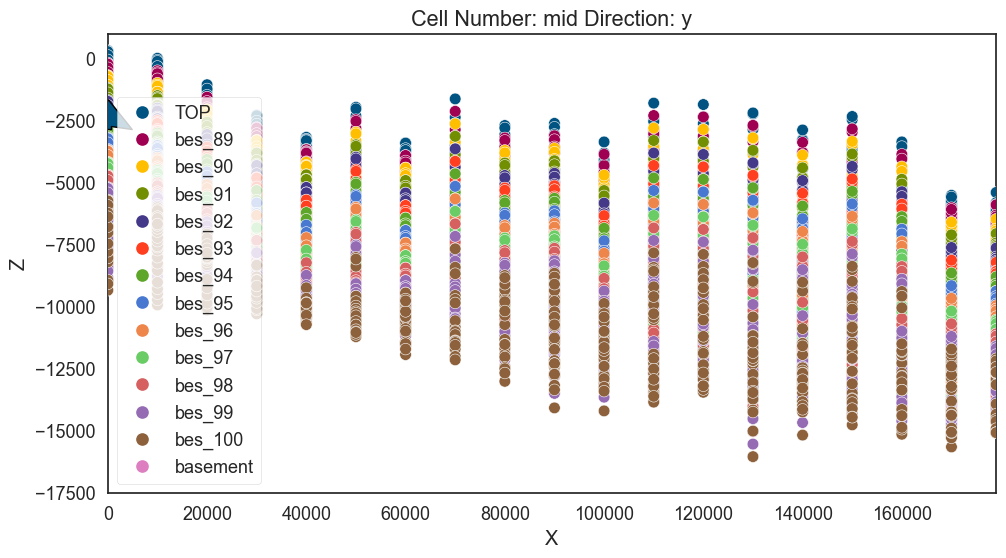

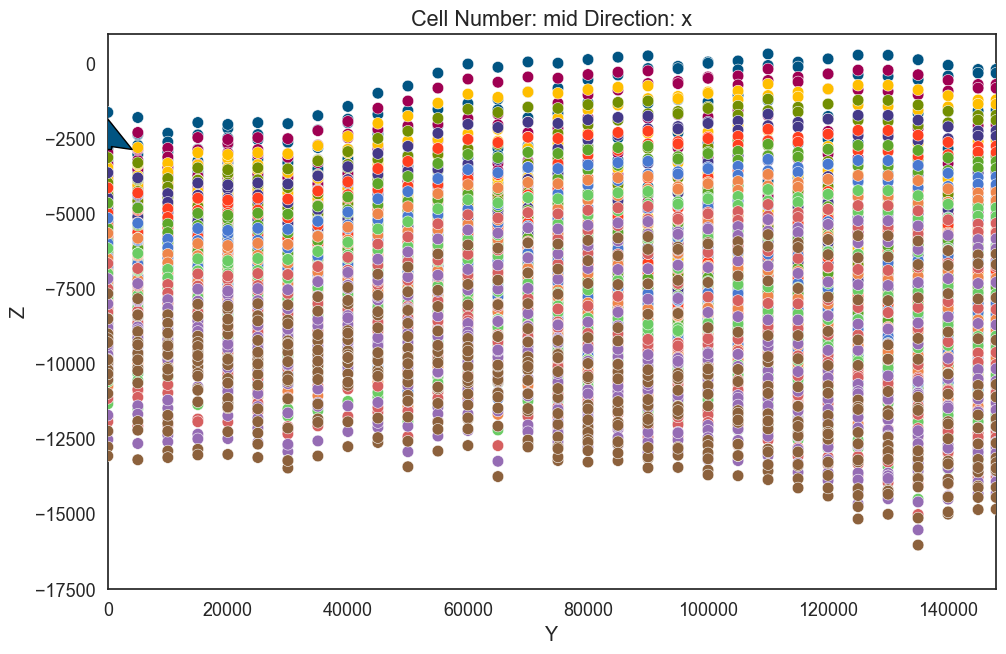

In [6]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=5, legend=True)
gp.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=5, legend=False)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [7]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="basic",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
    ve=2,
)

In [8]:
%%time
gp.set_interpolator(
    geo_model, 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
)

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                             values
range                232996.244605
$C_o$            1292553571.428571
drift equations             [3, 3]
Wall time: 27.5 s


In [9]:
%%time
gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

Wall time: 28min 4s



Lithology ids 
  [14. 14. 14. ...  1.  1.  1.] 

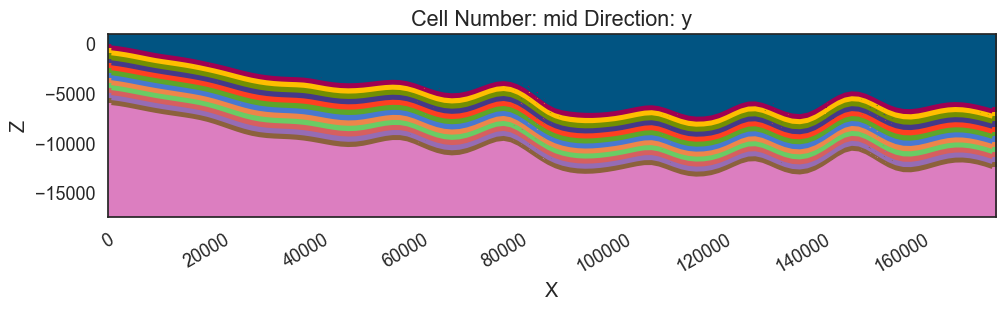

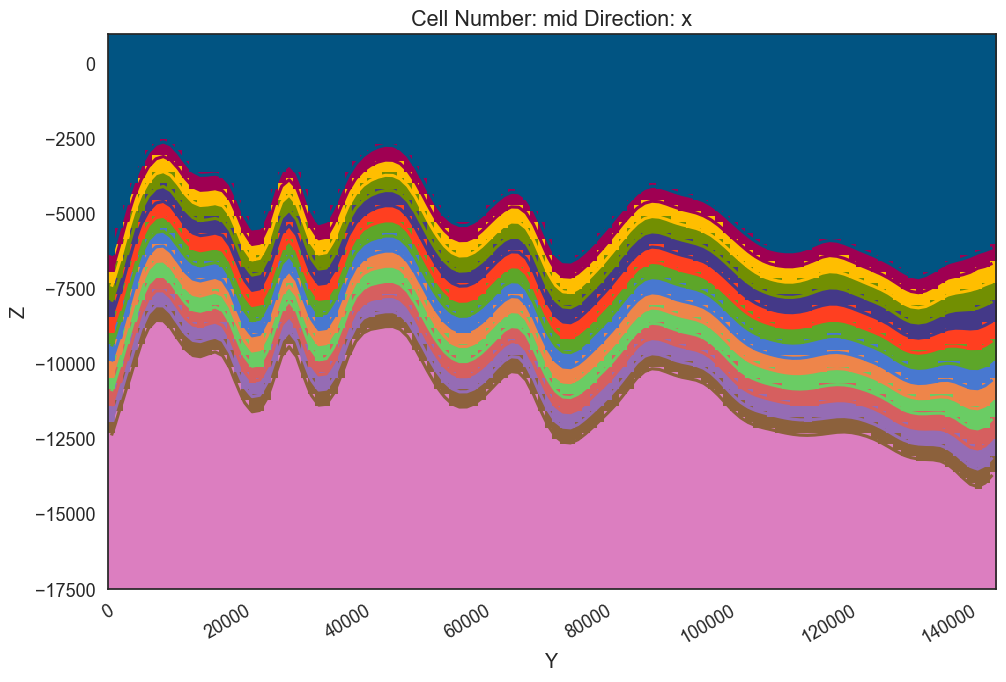

In [10]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True, ve=2, legend=True)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=5,
    legend=True,
)

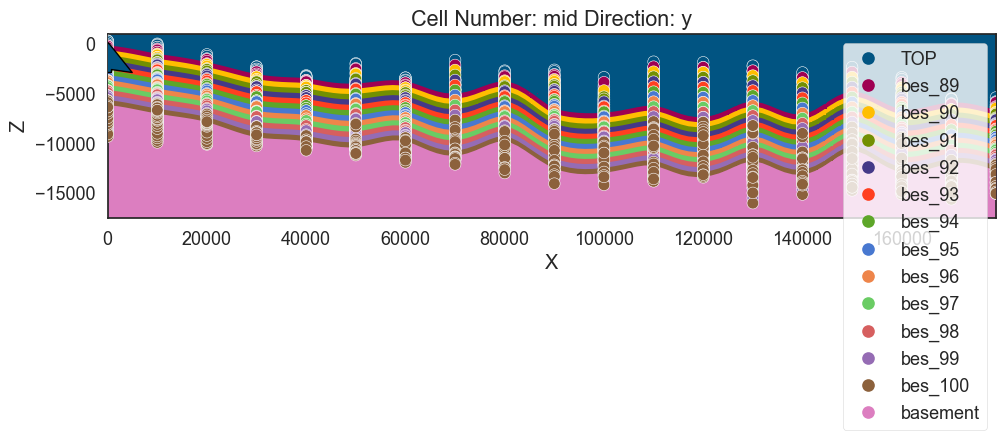

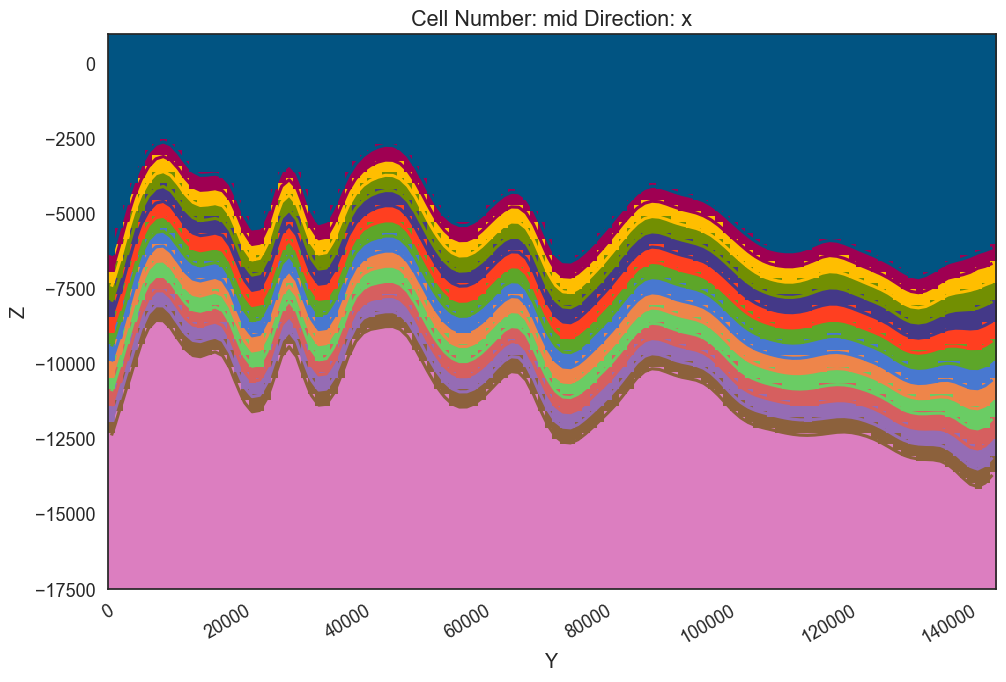

In [16]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=2, legend=True)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=5,
    legend=True,
)

In [22]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="basic", show_data=False, ve=5)

In [12]:
"""topo_init = tp.compute_topology(
    geo_model, direction="x", voxel_threshold=1
)  # , direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 1, topo_init[0], topo_init[1]
)"""

'topo_init = tp.compute_topology(\n    geo_model, direction="x", voxel_threshold=1\n)  # , direction="Y", cell_number=15)\nedges_init, centroids_init = tp.clean_unconformity_topology(\n    geo_model, 1, topo_init[0], topo_init[1]\n)'

In [13]:
"""# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=False,
    ve=1,
)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)"""

'# Seção transversal do modelo\ngp.plot_2d(\n    geo_model,\n    direction="y",\n    show_data=False,\n    show_lith=False,\n    ve=1,\n)\ngp.plot.plot_topology(geo_model, edges_init, centroids_init)'

In [14]:
"""# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    path="../../../output/",
    compress=True,
)"""

'# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)\ngp.save_model(\n    geo_model,\n    path="../../../output/",\n    compress=True,\n)'